In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat 

from textblob import TextBlob 

# Load Processed data
df = pd.read_csv(r"C:\Vanitha\Documents\GUVI\final_project\news_popularity_system\data\processed\news_cleaned.csv")

print("Dataset shape:", df.shape)
df.head() 

Dataset shape: (216191, 8)


,title,description,title_length,description_length,total_length,title_clean,description_clean,full_text
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,48,127,175,obama lays wreath at arlington national cemetery,obama lays wreath at arlington national cemete...,obama lays wreath at arlington national cemete...
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",43,137,180,a look at the health of the chinese economy,"tim haywood, investment director businessunit ...",a look at the health of the chinese economy [S...
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",48,137,185,nouriel roubini global economy not back to 2008,"nouriel roubini, nyu professor and chairman at...",nouriel roubini global economy not back to 200...
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,25,176,201,finland gdp expands in q4,finlands economy expanded marginally in the th...,finland gdp expands in q4 [SEP] finlands econo...
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,52,171,223,"tourism, govt spending buoys thai economy in j...",tourism and public spending continued to boost...,"tourism, govt spending buoys thai economy in j..."


In [3]:
# Null & empty checks
df.isnull().sum() 

title                  0
description           15
title_length           0
description_length     0
total_length           0
title_clean            0
description_clean     18
full_text              0
dtype: int64

In [4]:
(df["full_text"].str.strip() == "").sum() 

0

In [5]:
# Duplicate Validation (recheck)
duplicate_count = df.duplicated(subset=["full_text"]).sum()
print("Duplicate full_text rows:", duplicate_count) 

Duplicate full_text rows: 0


In [6]:
# Word Count Distribution
df["word_count"] = df["full_text"].apply(lambda x: len(x.split()))

df["word_count"].describe() 

count    216191.000000
mean         37.446272
std          10.683224
min           4.000000
25%          31.000000
50%          35.000000
75%          41.000000
max         178.000000
Name: word_count, dtype: float64

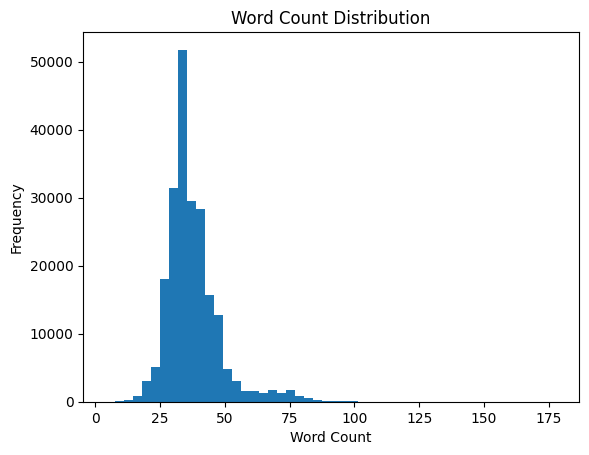

In [7]:
plt.hist(df["word_count"], bins=50)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show() 

In [8]:
# Sentiment Polarity
df["sentiment_polarity"] = df["full_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

df["sentiment_polarity"].describe() 

count    216191.000000
mean          0.068706
std           0.196417
min          -1.000000
25%           0.000000
50%           0.033333
75%           0.166667
max           1.000000
Name: sentiment_polarity, dtype: float64

In [9]:
# Subjectivity
df["subjectivity"] = df["full_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity) 

df["subjectivity"].describe() 

count    216191.000000
mean          0.344377
std           0.238937
min           0.000000
25%           0.166667
50%           0.343750
75%           0.500000
max           1.000000
Name: subjectivity, dtype: float64

In [10]:
# Readability Analysis
df["readability"] = df["full_text"].apply(lambda x: textstat.flesch_reading_ease(x))

df["readability"].describe() 

count    216191.000000
mean         49.469326
std          17.805786
min        -162.030000
25%          37.640000
50%          49.650000
75%          62.170000
max         117.160000
Name: readability, dtype: float64

In [11]:
# Lexical Diversity
def lexical_diversity(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

df["lexical_diversity"] = df["full_text"].apply(lexical_diversity)

df["lexical_diversity"].describe() 

count    216191.000000
mean          0.852682
std           0.071114
min           0.363636
25%           0.808511
50%           0.857143
75%           0.903226
max           1.000000
Name: lexical_diversity, dtype: float64

In [12]:
# Urgency Keyword Presence
URGENCY_KEYWORDS = [
    "breaking", "urgent", "alert", "just in", "now", "today", "exclusive"
]

def urgency_flag(text): 
    text = text.lower() 
    return any(word in text for word in URGENCY_KEYWORDS) 

df["urgency_flag"] = df["full_text"].apply(urgency_flag) 

df["urgency_flag"].value_counts(normalize=True) * 100 

urgency_flag
False    90.56575
True      9.43425
Name: proportion, dtype: float64